<a href="https://colab.research.google.com/github/Neelanjan-Goswami/ML-Internship-B/blob/master/Internship_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis of Car Features**

**Car Features and MSRP**

Includes features such as make, model, year, and engine type to predict price

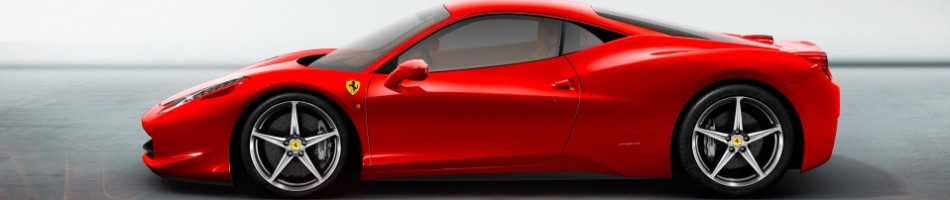

Cars dataset with features including make, model, year, engine, and other properties of the car used to predict its price.

### **Exploratory data analysis in Python.**

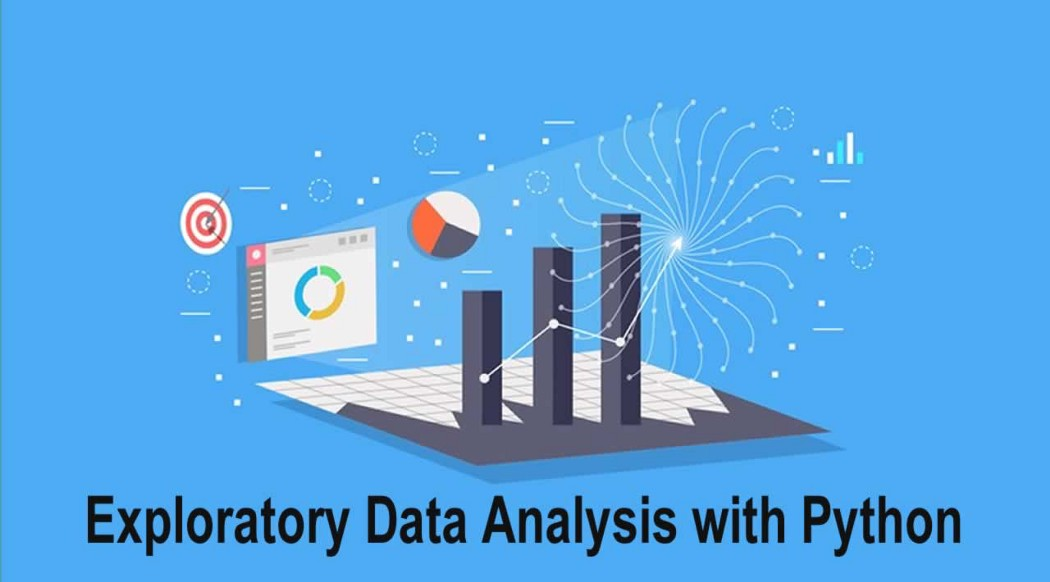


### **What is Exploratory Data Analysis?**
Exploratory Data Analysis or (EDA) is understanding the data sets by summarizing their main characteristics often plotting them visually. This step is very important especially when we arrive at modeling the data in order to apply Machine learning. Plotting in EDA consists of Histograms, Box plot, Scatter plot and many more. It often takes much time to explore the data. Through the process of EDA, we can ask to define the problem statement or definition on our data set which is very important.


### **How to perform Exploratory Data Analysis?**
This is one such question that everyone is keen on knowing the answer. Well, the answer is it depends on the data set that you are working. There is no one method or common methods in order to perform EDA, whereas in this tutorial you can understand some common methods and plots that would be used in the EDA process.


### **What data are we exploring today?**
Since I am a huge fan of cars, I got a very beautiful data-set of cars from Kaggle. The data-set can be downloaded from here. 

To give a piece of brief information about the data set this data contains more of 12, 000 rows and more than 10 columns which contains features of the car such as Engine Fuel Type, Engine Size, HP, Transmission Type, highway MPG, city MPG and many more.

###  **Context**
As a data scientist, the majority of your time will be spent on data pre-processing i.e.
making sure you have the right data in the right format. Once this is done, you get a
sense of your dataset through applying some descriptive statistics and then, you move
on to the exploration stage wherein you plot various graphs and mine the hidden
insights. In this project, you as a data scientist are expected to perform Exploratory data
analysis on how the different features of a car and its price are related. The data comes
from the Kaggle dataset "Car Features and MSRP". It describes almost 12,000 car
models, sold in the USA between 1990 and 2017, with the market price (new or used)
and some features.

### **Objective**
The objective of the project is to do data pre-processing and exploratory data analysis
of the dataset

### **Data Description**


*   Make : Car Make
*   Model : Car Model
*   Year : Car Year (Marketing)
*   Engine Fuel Type : Engine Fuel Type
*   Engine HP Engine : HorsePower (HP)
*   Engine Cylinders : Engine Cylinders
*   Transmission Type : Transmission Type
*   Driven_Wheels : Driven Wheels
*   Number of Doors : Number of Doors
*   Market Category : Market Category
*   Vehicle Size : Size of Vehicle
*   Vehicle Style : Type of Vehicle
*   highway MPG : Highway MPG
*   city mpg : City MPG
*   Popularity : Popularity (Twitter)
*   MSRP Manufacturer : Suggested Retail Price


















### **Steps**
1. Import the dataset and the necessary libraries, check datatype, statistical summary,
shape, null values etc.
2. Are there any columns in the dataset which you think are of less relevance. If so, give
your reasoning and drop them.
3. Rename the columns "Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission
Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city
mpg": "MPG-C", "MSRP": "Price"
4. Check for any duplicates in the data, check for null values and missing data and remove
them.
5. Plot graphs of various columns to check for outliers and remove those data points from the
dataset.
6. What car brands are the most represented in the dataset and find the average price among
the top car brands.
7. Plot the correlation matrix and document your insights.
8. Perform EDA and plot different graphs and document your findings (Try to see how other
variables affect the price of the car)
9. (Extra Credits)Split the dataset into 80 and 20 ratio and build a machine learning model with
Price as the target variable
10. (Extra Credits)Try different algorithms and check their performance over metrics like R
square, RMSE, MAE etc and document your findings



### 1.   **Import the dataset and the necessary libraries, check datatype, statistical summary, shape, null values etc.**



1.1 **Importing the required libraries for EDA**

Below are the libraries that are used in order to perform EDA (Exploratory data analysis).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

1.2. **Loading the data into the data frame.**
Loading the data into the pandas data frame is certainly one of the most important steps in EDA, as we can see that the value from the data set is comma-separated. So all we have to do is to just read the CSV into a data frame and pandas data frame does the job for us.

In [ ]:
car_data=pd.read_csv('data.csv')

In [ ]:
car_data.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
car_data.tail(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


1.3. **Checking the types of data**

Here we check for the datatypes because sometimes the MSRP or the price of the car would be stored as a string or object, if in that case, we have to convert that string to the integer data only then we can plot the data via a graph. Here, in this case, the data is already in integer format so nothing to worry.

In [ ]:
car_data.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [ ]:
car_data.mean().shape

(8,)

In [ ]:
car_data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [ ]:
car_data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


### 2. **Are there any columns in the dataset which you think are of less relevance. If so, give your reasoning and drop them.**

2.1. **Dropping irrelevant columns**

This step is certainly needed in every EDA because sometimes there would be many columns that we never use in such cases dropping is the only solution. In this case, the columns such as Market Category, Popularity, Number of doors, Vehicle Size doesn't make any sense to me so I just dropped for this instance.

In [ ]:
car_data=pd.read_csv('data.csv')

In [ ]:
car_data = car_data.drop(['Engine Fuel Type', 'Vehicle Style','Market Category', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1)
car_data.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


### 3. **Rename the columns "Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price"**

In this instance, most of the column names are very confusing to read, so I just tweaked their column names. This is a good approach it improves the readability of the data set.

In [ ]:
car_data = car_data.rename(columns={'Engine HP': 'HP', 'Engine Cylinders': 'Cylinders', 'Transmission Type': 'Transmission', 'Driven_Wheels': 'Drive Mode', 'highway MPG': 'MPG-H', 'city mpg': 'MPG-C', 'MSRP': 'Price' })
car_data.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


### 4. **Check for any duplicates in the data, check for null values and missing data and remove them.**

4.1 **Dropping the duplicate rows**

This is often a handy thing to do because a huge data set as in this case contains more than 10, 000 rows often have some duplicate data which might be disturbing, so here I remove all the duplicate value from the data-set. For example prior to removing I had 11914 rows of data but after removing the duplicates 10925 data meaning that I had 989 of duplicate data.

In [ ]:
car_data.shape

(11914, 10)

In [ ]:
duplicate_rows_car_data = car_data[car_data.duplicated()]
print('number of duplicate rows: ', duplicate_rows_car_data.shape)

number of duplicate rows:  (989, 10)


Now let us remove the duplicate data because it's ok to remove them.

In [ ]:
car_data.count() 

Make            11914
Model           11914
Year            11914
HP              11845
Cylinders       11884
Transmission    11914
Drive Mode      11914
MPG-H           11914
MPG-C           11914
Price           11914
dtype: int64

So seen above there are 11914 rows and we are removing 989 rows of duplicate data.

In [ ]:
car_data = car_data.drop_duplicates()
car_data.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [ ]:
car_data.count()

Make            10925
Model           10925
Year            10925
HP              10856
Cylinders       10895
Transmission    10925
Drive Mode      10925
MPG-H           10925
MPG-C           10925
Price           10925
dtype: int64

4.2 **Dropping the missing or null values.**

This is mostly similar to the previous step but in here all the missing values are detected and are dropped later. Now, this is not a good approach to do so, because many people just replace the missing values with the mean or the average of that column, but in this case, I just dropped that missing values. This is because there is nearly 100 missing value compared to 10, 000 values this is a small number and this is negligible so I just dropped those values.

In [ ]:
car_data.isnull().sum()

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64

This is the reason in the above step while counting both Cylinders and Horsepower (HP) had 10856 and 10895 over 10925 rows.

In [ ]:
# Dropping the missing values.
car_data = car_data.dropna() 
car_data.count()

Make            10827
Model           10827
Year            10827
HP              10827
Cylinders       10827
Transmission    10827
Drive Mode      10827
MPG-H           10827
MPG-C           10827
Price           10827
dtype: int64

Now we have removed all the rows which contain the Null or N/A values (Cylinders and Horsepower (HP)).

In [ ]:
# After dropping the values
print(car_data.isnull().sum()) 

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG-H           0
MPG-C           0
Price           0
dtype: int64


### 5. **Plot graphs of various columns to check for outliers and remove those data points from the dataset.**

5.1 **Plotting graphs of various columns**

5.1.1 **Histogram**

Histogram refers to the frequency of occurrence of variables in an interval. In this case, there are mainly 10 different types of car manufacturing companies, but it is often important to know who has the most number of cars. To do this histogram is one of the trivial solutions which lets us know the total number of car manufactured by a different company.

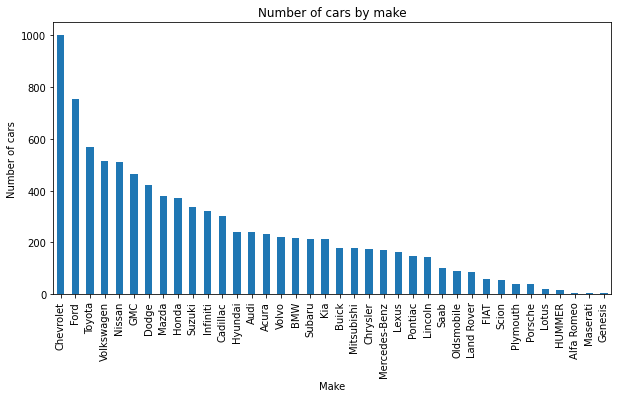

In [ ]:
car_data.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('Number of cars by make')
plt.ylabel('Number of cars')
plt.xlabel('Make');

5.1.2 **Heat Maps**

Heat Maps is a type of plot which is necessary when we need to find the dependent variables. One of the best way to find the relationship between the features can be done using heat maps. In the below heat map we know that the price feature depends mainly on the Engine Size, Horsepower, and Cylinders.

,Year,HP,Cylinders,MPG-H,MPG-C,Price
Year,1.000000,0.326726,-0.133920,0.378479,0.338145,0.592983
HP,0.326726,1.000000,0.715237,-0.443807,-0.544551,0.739042
Cylinders,-0.133920,0.715237,1.000000,-0.703856,-0.755540,0.354013
MPG-H,0.378479,-0.443807,-0.703856,1.000000,0.939141,-0.106320
MPG-C,0.338145,-0.544551,-0.755540,0.939141,1.000000,-0.180515
Price,0.592983,0.739042,0.354013,-0.106320,-0.180515,1.000000


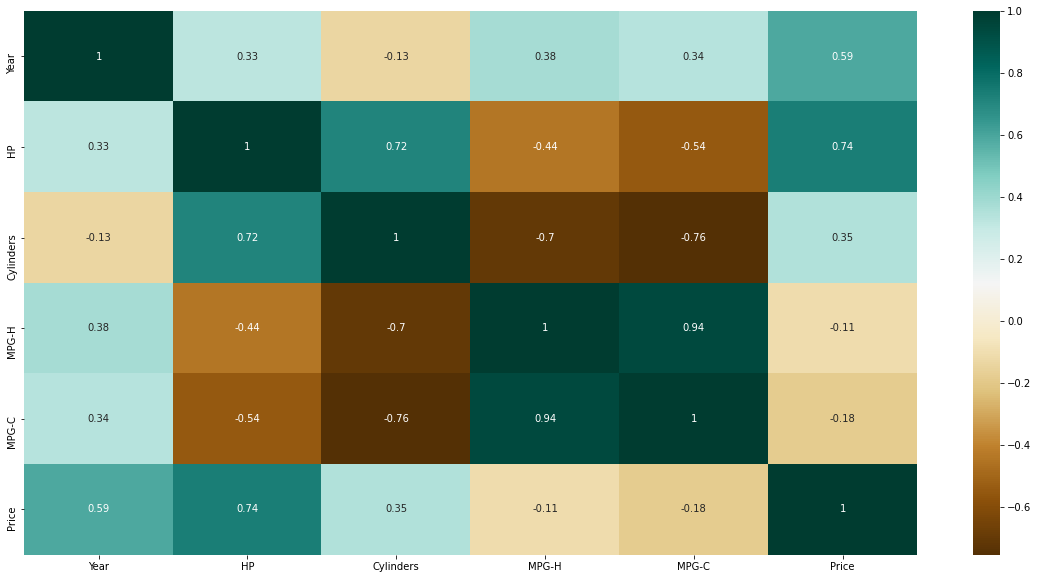

In [ ]:
plt.figure(figsize=(20,10))
carc= car_data.corr()
sns.heatmap(carc,cmap='BrBG',annot=True)
carc

5.1.3 **Scatterplot**

We generally use scatter plots to find the correlation between two variables. Here the scatter plots are plotted between Horsepower and Price and we can see the plot below. With the plot given below, we can easily draw a trend line. These features provide a good scattering of points.

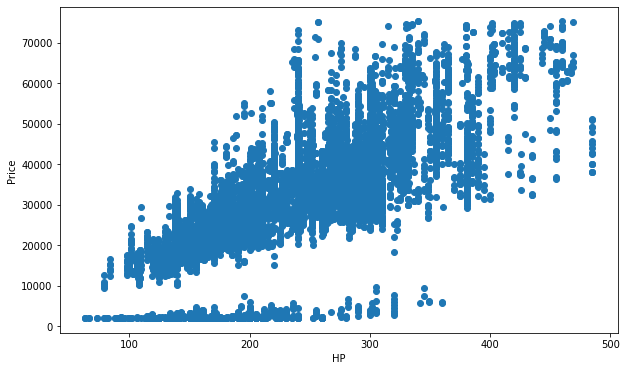

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(car_data['HP'], car_data['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

5.2 **Check for outliers**

An outlier is a point or set of points that are different from other points. Sometimes they can be very high or very low. It’s often a good idea to detect and remove the outliers. Because outliers are one of the primary reasons for resulting in a less accurate model. Hence it’s a good idea to remove them. The outlier detection and removing that I am going to perform is called IQR score technique. Often outliers can be seen with visualizations using a box plot. Shown below are the box plot of MSRP, Cylinders, Horsepower and EngineSize. Herein all the plots, you can find some points are outside the box they are none other than outliers.

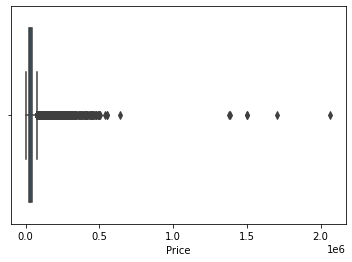

In [ ]:
sns.boxplot(x=car_data['Price'])

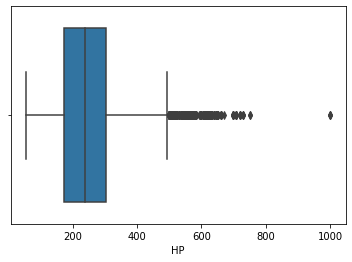

In [ ]:
sns.boxplot(x=car_data['HP'])

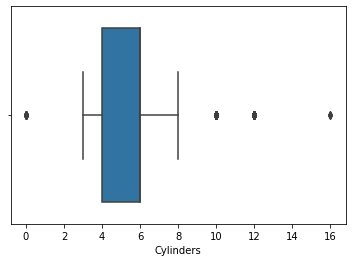

In [ ]:
sns.boxplot(x=car_data['Cylinders'])

In [ ]:
Q1 = car_data.quantile(0.25)
Q3 = car_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year             9.0
HP             130.0
Cylinders        2.0
MPG-H            8.0
MPG-C            6.0
Price        21327.5
dtype: float64


5.3 **Remove those data points from the dataset.**

We don’t worry about the above values because it’s not important to know each and every one of them because it's just important to know how to use this technique in order to remove the outliers.

In [ ]:
car_data = car_data[~((car_data < (Q1-1.5 * IQR)) |(car_data > (Q3 + 1.5 * IQR))).any(axis=1)]
car_data.shape

(9191, 10)

As seen above there were around 1600 rows were outliers. But you cannot completely remove the outliers because even after you use the above technique there maybe 1–2 outlier unremoved but that ok because there were more than 100 outliers. Something is better than nothing.


###6. **What car brands are the most represented in the dataset and find the average price among the top car brands.**

7. Plot the correlation matrix and document your insights.
8. Perform EDA and plot different graphs and document your findings (Try to see how other
variables affect the price of the car)
9. (Extra Credits)Split the dataset into 80 and 20 ratio and build a machine learning model with
Price as the target variable
10. (Extra Credits)Try different algorithms and check their performance over metrics like R
square, RMSE, MAE etc and document your findings